### Group 2 Inter Annotator Agreement Analysis
- Author: Sushma Anand Akoju, Email: sushmaakoju@arizona.edu

In [1]:
!pip install agreement

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install krippendorff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.7/595.7 KB 37.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Colab\ Notebooks/natural\-logic
!ls

In [5]:
import sklearn.metrics
from sklearn.metrics import cohen_kappa_score

In [6]:
import pandas as pd
import numpy as np

In [7]:
%cd /content/gdrive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined/
!ls 


/content/gdrive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined
annotators_group_1.xlsx  annotators_group_2.xlsx


In [8]:
filename = "/content/gdrive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined/annotators_group_2.xlsx"

In [64]:
import os
os.path.exists(filename)

True

In [65]:
sheet_names = pd.ExcelFile(filename).sheet_names[:-1]
sheet_names

['block_7_211',
 'block_8_212',
 'block_12_455',
 'block_11_443',
 'block_9_273',
 'block_10_342',
 'block_13_751',
 'block_14_1131']

In [12]:
block_12 = pd.concat([pd.read_excel(filename, sheet_name='block_7_211'), pd.read_excel(filename, sheet_name='block_8_212')])
block_123 = pd.concat([pd.read_excel(filename, sheet_name='block_9_273'), pd.read_excel(filename, sheet_name='block_10_342'), pd.read_excel(filename, sheet_name='block_14_1131')])
block_13 = pd.read_excel(filename, sheet_name='block_13_751')[['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'R',
        'S']]
block_23 = pd.read_excel(filename, sheet_name='block_12_455')[['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'H',
        'S']]
block_3 = pd.read_excel(filename, sheet_name='block_11_443')[['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified',
        'Unnamed: 6', 'S']]

In [11]:
block_12.columns,block_123.columns, block_13.columns, block_23.columns, block_3.columns

(Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'R',
        'H'],
       dtype='object'), Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'R',
        'H', 'S'],
       dtype='object'), Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'R',
        'S', 'Unnamed: 8'],
       dtype='object'), Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'H',
        'S', 'Unnamed: 8'],
       dtype='object'), Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
        'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified',
        'Unnamed: 6', 'S', 'Unnamed: 8'],
       dtype='object'))

In [ ]:
block_12.head(),block_123.head(), block_13.head(), block_23.columns, block_3.columns

# Blocks : 211 & 212

SICK_id 211:
Premise: two dogs are playing by a tree,	Hypothesis: two dogs are playing by a plant. Label:  Entailment

SICK_id 212:
Premise: two dogs are playing by a tree,	Hypothesis: two dogs are sleeping by a tree. Label: Neutral

In [15]:
block_12['SICK_id'] = block_12['SICK_id'].astype('int')

block_12.head(), block_12['R'].unique(), block_12['H'].unique()

(   SICK_id                               Premise  \
 0      211        two dogs are playing by a tree   
 1      211  every two dogs are playing by a tree   
 2      211        two dogs are playing by a tree   
 3      211  every two dogs are playing by a tree   
 4      211   some two dogs are playing by a tree   
 
                               Hypothesis Modifier Premise/Hypothesis/Both  \
 0        two dogs are playing by a plant     NONE                    NONE   
 1        two dogs are playing by a plant    every                 Premise   
 2  every two dogs are playing by a plant    every              Hypothesis   
 3  every two dogs are playing by a plant    every                    Both   
 4        two dogs are playing by a plant     some                 Premise   
 
   Part of Premise/Hypothesis Modified   R      H  
 0                                NONE  FE     FE  
 1                             Subject  FE     FE  
 2                             Subject  RE  Cover  
 3

In [21]:
block_12['R'].value_counts()

Neutral     113
FE           55
RE           10
Negation      8
Name: R, dtype: int64

In [19]:
block_12['H'].value_counts()

Alternation    73
FE             57
Neutral        45
Negation        5
Cover           4
RE              2
Name: H, dtype: int64

In [22]:
block_12['SICK_id'].unique()

array([211, 212])

In [23]:
label_map = {'FE':1, 'RE':2, 'Negation':3, 'Neutral':4, 'Alternation':5, 'Equivalence':6, 'Cover':7}

In [24]:
for i in ['R', 'H']:
  block_12[i] = block_12[i].map(label_map)

In [32]:
block_12['R'][block_12['R'].isna()], block_12['H'][block_12['H'].isna()], block_12.shape[0]

(Series([], Name: R, dtype: int64), Series([], Name: H, dtype: int64), 186)

### Cohen Kappa Score
A pairwise inetr-rater reliability statistic. 
Considering probability of agreement by chance.
We have 7 labels and 2 annotators and 186 observations in total.
So labels are mutually exclusive. (Assume so for now)
$p_0$ relative observed agreement
$p_1$ hypothetical agreement by chance
$p_0 = \frac{1}{186^2} \sum n_{k_1} n_{k_2} $  where $n_{k_1}$ and $n_{k_2}$ are number of times rater i (first or second) labelled k. 

These scores are calculated pairwise so at any time it is agreement between two raters.

In [31]:
labellers = {1:'R', 2:'H'}
cohen_kappa_scores = {}

cohen_kappa_scores[(labellers[1], labellers[2])] = cohen_kappa_score(block_12[labellers[1]], block_12[labellers[2]])
print(cohen_kappa_scores[(labellers[1], labellers[2])])

0.34974920200638415


### Label-wise agreements (as a confusion matrix)
- First we'd like to assess the maximum agreement between each pair of annotators for each label they labelled.

In [36]:
from pycm import *

cm = ConfusionMatrix(actual_vector=block_12['R'].to_numpy(), predict_vector=block_12['H'].to_numpy(), is_imbalanced=True) 

## Seeing maximum agreement for the label that was chosen most of the times for just two annotators.

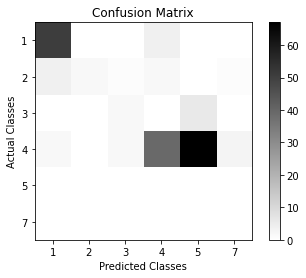

In [37]:
cm.plot()

In [38]:
cm.print_matrix()

Predict  1        2        3        4        5        7        
Actual
1        51       0        0        4        0        0        

2        4        2        1        2        0        1        

3        0        0        2        0        6        0        

4        2        0        2        39       67       3        

5        0        0        0        0        0        0        

7        0        0        0        0        0        0        




In [41]:
cm.table

{1: {1: 51, 2: 0, 3: 0, 4: 4, 5: 0, 7: 0},
 2: {1: 4, 2: 2, 3: 1, 4: 2, 5: 0, 7: 1},
 3: {1: 0, 2: 0, 3: 2, 4: 0, 5: 6, 7: 0},
 4: {1: 2, 2: 0, 3: 2, 4: 39, 5: 67, 7: 3},
 5: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0},
 7: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}}

In [40]:
label_map

{'FE': 1,
 'RE': 2,
 'Negation': 3,
 'Neutral': 4,
 'Alternation': 5,
 'Equivalence': 6,
 'Cover': 7}

In [42]:
lmap = {1:'FE', 2:'RE', 3:'Negation', 4:'Neutral', 5:'Alternation', 6:'Equivalence', 7:'Cover'}

In [43]:
a1_counts = {}
for k, v in block_12['R'].value_counts().to_dict().items():
  a1_counts[lmap[k]] = v
a1_counts

{'Neutral': 113, 'FE': 55, 'RE': 10, 'Negation': 8}

In [44]:
a2_counts = {}
for k, v in block_12['H'].value_counts().to_dict().items():
  a2_counts[lmap[k]] = v
a2_counts

{'Alternation': 73,
 'FE': 57,
 'Neutral': 45,
 'Negation': 5,
 'Cover': 4,
 'RE': 2}

In [46]:
sum_counts = {}
for key in ['FE','RE', 'Neutral','Negation' ]:
  sum_counts[key] = a1_counts[key] + a2_counts[key]
sum_counts['Alternation'] = a2_counts['Alternation']
sum_counts['Cover'] = a2_counts['Cover']
sum_counts

{'FE': 112,
 'RE': 12,
 'Neutral': 158,
 'Negation': 13,
 'Alternation': 73,
 'Cover': 4}

### Observing F1, precision and recall scores for pairwise confusion matrices.
In this case, we consider a case where each annotator i can be Gold label annotator and compared with every other annotator j from remaining 1 annotators. So we consider the case that chosen Gold labels i.e. annotator's labels as Ground truth and we calculate pairwise "Supposed Gold label" with another annotator's labels. 

This is to say between any two annotators, we choose any one annotator, we would like to see how much agreement can exist and how would that reflect as F1, precision and recall scores.

- For each pair of annotators, consider ith annotator to have ground truth and jth annotator to be prediction labels.
- We still observe maximum agreement >50% for FE Labels.
- We do observ ~50.53% precision, recall and F1-scores. Would not be very helpful, since we do not have "True Gold labels". 
- We use the following information for assessing how to design annotation schemes annotating automatically modified premise, hypothesis sentences with Generalized quantifiers as well as Adjectives & adverbs.
- We want to observe the amount of labeling confusion that quantifiers and modifiers introduce.
- We consider that wherever the label is not FE or RE, we can see maximum confusion. 
- Neutral - has second best agreement & is second most chosen label
- Forward Entailment - has max best agreement & is also second most chosen label
- All other cases, signify confusion due to level of difficulty.

Total 186 * 2 = 372 labels required by 2 annotators for 186 premise, hypothesis pairs.

- 'FE': 112,
- 'RE': 12,
- 'Neutral': 158,
- 'Negation': 13,
- 'Alternation': 73,
- 'Cover': 4


In [48]:

cm = {}

cm[('R', 'H')] = ConfusionMatrix(actual_vector=block_12['R'].to_numpy(), predict_vector=block_12['H'].to_numpy())
cm[('H','R')] = ConfusionMatrix(actual_vector=block_12['H'].to_numpy(), predict_vector=block_12['R'].to_numpy())
print(cm[('R', 'H')])
print(cm[('H','R')])

Predict  1        2        3        4        5        7        
Actual
1        51       0        0        4        0        0        

2        4        2        1        2        0        1        

3        0        0        2        0        6        0        

4        2        0        2        39       67       3        

5        0        0        0        0        0        0        

7        0        0        0        0        0        0        





Overall Statistics : 

95% CI                                                            (0.43352,0.57723)
ACC Macro                                                         0.83513
ARI                                                               0.44807
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.49879
Bennett S                                                       

### Looking at total agreement counts for each label between each pair of annotators.
- Max agreement is for FE, then Neutral.
- But we cannot say if agreement was most, complexity to identify each of these three labels was easy.

In [50]:
for k,v in cm.items():
  print(k)
  print(v.table)

('R', 'H')
{1: {1: 51, 2: 0, 3: 0, 4: 4, 5: 0, 7: 0}, 2: {1: 4, 2: 2, 3: 1, 4: 2, 5: 0, 7: 1}, 3: {1: 0, 2: 0, 3: 2, 4: 0, 5: 6, 7: 0}, 4: {1: 2, 2: 0, 3: 2, 4: 39, 5: 67, 7: 3}, 5: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}, 7: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}}
('H', 'R')
{1: {1: 51, 2: 4, 3: 0, 4: 2, 5: 0, 7: 0}, 2: {1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 7: 0}, 3: {1: 0, 2: 1, 3: 2, 4: 2, 5: 0, 7: 0}, 4: {1: 4, 2: 2, 3: 0, 4: 39, 5: 0, 7: 0}, 5: {1: 0, 2: 0, 3: 6, 4: 67, 5: 0, 7: 0}, 7: {1: 0, 2: 1, 3: 0, 4: 3, 5: 0, 7: 0}}


## Cohen Kappa scores for modified labels 

Total 186 * 2 = 372 labels required by 2 annotators for 186 premise, hypothesis pairs.

- 'FE': 112,
- 'RE': 12,
- 'Neutral': 158,
- 'Negation': 13,
- 'Alternation': 73,
- 'Cover': 4

So we recalculate the Cohen kappa score which is now: 34.97%.

In [52]:
labellers = {1:'R', 2:'H'}
cohen_kappa_scores_modified = {}

cohen_kappa_scores_modified[(labellers[1], labellers[2])] = cohen_kappa_score(block_12[labellers[1]], block_12[labellers[2]])
print(cohen_kappa_scores_modified[(labellers[1], labellers[2])])

0.34974920200638415


## Fleiss Kappa scores
This is another way of finding above the level of agreement expected by chance. This considers random sampling among the raters (a little better than voted ratings, due to "randomness").
Although this is purely statistical, since we have types of modifiers which influence thge rater's choice of label, we consider this for some "randomized" assessment for a approximated agreement scores. 

The score considers that if no one chose "this" label, we could still find out expected chance of agreement on "this" label.

This does not tell if agreement is good enough. But just that if an agreement exists then how better is it to that of agreement by chance which in this case is 28.11%.

In [54]:
from statsmodels.stats import inter_rater as irr
data, categories = irr.aggregate_raters(block_12[['R','H']].to_numpy())
irr.fleiss_kappa(data, method='fleiss')

0.28114432145182633

### Krippendorff's Alpha
Essentially measures amount of reliability as a measure of disagreement.
However this might not be relevant here, since we do not have concrete Ground truth. But if we did assume we did have Ground truth and this was reliable, this is how much reliable these labels based on agreement calculated from ratio of observed disagreement and disagreement expected by chance can be.

Here krippendorff's alpha is 77.86%

In [55]:
import krippendorff
krippendorff.alpha(block_12[['R','H']].to_numpy().T)

0.7786146952194375

In [56]:
import agreement
from agreement.utils.kernels import linear_kernel

from agreement.metrics import cohens_kappa, krippendorffs_alpha, scotts_pi
from agreement.utils.transform import pivot_table_frequency


In [57]:
this_array = []
for i,l in enumerate(block_12[['R','H']].to_numpy()):
  for k in range(0,2):
    this_array.append([i,k+1, l[k]])
arr = np.array(this_array)
questions_answers_table = pivot_table_frequency(arr[:, 0], arr[:, 2])

### Recomputing Cohen's kappa, krippendorff's alpha while calculating Scott's pi

Scott's Pi is similar to Cohen's kappa, except it considered squared joint proportions to calculate inter-annotator reliability.

In this case, Scott's pi is 28.11% different from Cohen's kappa

In [58]:
users_answers_table = pivot_table_frequency(arr[:, 1], arr[:, 2])
kappa = cohens_kappa(questions_answers_table, users_answers_table)
weighted_kappa = cohens_kappa(questions_answers_table, users_answers_table, weights_kernel=linear_kernel)

alpha = krippendorffs_alpha(questions_answers_table)
pi = scotts_pi(questions_answers_table)

In [59]:
kappa, weighted_kappa, alpha, pi

(0.349749202006384, 0.6411379986919555, 0.283076729189859, 0.28114432145182633)

## Agreements based on Quantifier & Modified SVO

In [60]:
u = ["every", "always", "never", "everyone of"]
e = ["some", "at least", "exactly one", "all but one"]
n = ["not every", "no", "not"]
adj = ["green", "happy", "sad", "good", "bad", "abnormally", "elegantly", "an elegant", "an abnormal"]

In [61]:
def get_quantifier_type(x):
  if x in u:
    return "Universal"
  elif x in e:
    return "Existential"
  elif x in n:
    return "Negation"
  elif x in adj:
    return "Adjectives/Adverbs"
  else:
    return "NONE"

In [62]:
block_12['Quantifier Type'] = block_12['Modifier'].apply(lambda x: get_quantifier_type(x)  )
block_12

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,R,H,Quantifier Type
0,211,two dogs are playing by a tree,two dogs are playing by a plant,NONE,NONE,NONE,1,1,NONE
1,211,every two dogs are playing by a tree,two dogs are playing by a plant,every,Premise,Subject,1,1,Universal
2,211,two dogs are playing by a tree,every two dogs are playing by a plant,every,Hypothesis,Subject,2,7,Universal
3,211,every two dogs are playing by a tree,every two dogs are playing by a plant,every,Both,Subject,2,1,Universal
4,211,some two dogs are playing by a tree,two dogs are playing by a plant,some,Premise,Subject,1,1,Existential
...,...,...,...,...,...,...,...,...,...
88,212,Two dogs are playing by a tree,Two dogs are sleeping by exactly one tree,exactly one,Hypothesis,Object,4,5,Existential
89,212,Two dogs are playing by exactly one tree,Two dogs are sleeping by exactly one tree,exactly one,Both,Object,4,5,Existential
90,212,Two dogs are playing by a an elegant tree,Two dogs are sleeping by a tree\n,an elegant,Premise,Object,4,5,Adjectives/Adverbs
91,212,Two dogs are playing by a tree,Two dogs are sleeping by a an elegant tree,an elegant,Hypothesis,Object,4,5,Adjectives/Adverbs


In [81]:
cm_one_way = ConfusionMatrix(actual_vector=block_12['R'].to_list(), predict_vector=block_12['H'].to_list(), classes=lmap)
cm_two_way = ConfusionMatrix(actual_vector=block_12['H'].to_list(), predict_vector=block_12['R'].to_list(), classes=lmap)
cm_one_way.relabel(mapping= {k:lmap[k] for k in cm_one_way.classes})
cm_two_way.relabel(mapping= {k:lmap[k] for k in cm_two_way.classes})
cp = Compare({"R_H":cm_one_way,"H_R":cm_two_way})
print(cp)

Best : H_R

Rank  Name   Class-Score       Overall-Score
1     H_R    0.36528           0.31389
2     R_H    0.32778           0.31389



In [78]:
lmap

{1: 'FE',
 2: 'RE',
 3: 'Negation',
 4: 'Neutral',
 5: 'Alternation',
 6: 'Equivalence',
 7: 'Cover'}

In [82]:
cp.best, cp.sorted, cp.best_name

(pycm.ConfusionMatrix(classes: ['Alternation', 'Cover', 'FE', 'Negation', 'Neutral', 'RE']),
 ['H_R', 'R_H'],
 'H_R')

In [83]:
cm_one_way.classes, cm_two_way.classes

(['Alternation', 'Cover', 'FE', 'Negation', 'Neutral', 'RE'],
 ['Alternation', 'Cover', 'FE', 'Negation', 'Neutral', 'RE'])

### Seeing the Confusion matrix density plots for Max agreement between each pair of annotators.

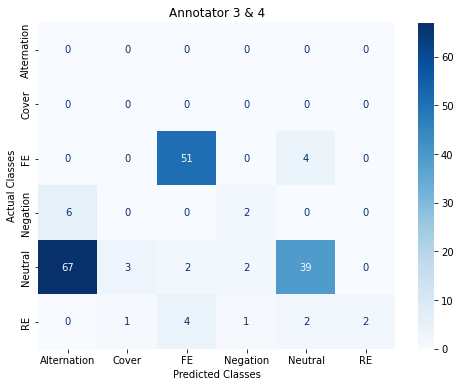

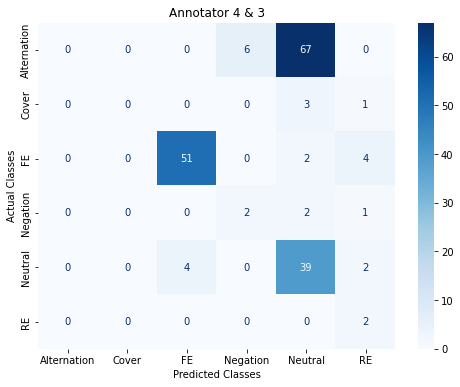

In [98]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
cm_one_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 3 & 4")
plt.savefig('blocks_211_212_ann34.png', dpi=100)
cm_two_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 4 & 3")
plt.savefig('blocks_211_212_ann43.png', dpi=100)

In [100]:
block_12 = block_12.rename(columns={'Part of Premise/Hypothesis Modified':'Modified SUBJ/VERB/OBJECT'})
res = block_12.groupby(['Modified SUBJ/VERB/OBJECT', 'R', 'H']).count().reset_index()[[ 'Quantifier Type', 'Modified SUBJ/VERB/OBJECT', 'R', 'H','Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Modified SUBJ/VERB/OBJECT','R', 'H','Quantifier Type']]
r= r.rename(columns={ 'Quantifier Type':'Count'})
print("****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 ******** ")
r

****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 ******** 


,Modified SUBJ/VERB/OBJECT,R,H,Count
8,Object,4,5,32
19,Subject,4,5,25
2,Object,1,1,21
10,Subject,1,1,21
18,Subject,4,4,14
7,Object,4,4,12
26,Verb,4,5,10
25,Verb,4,4,10
21,Verb,1,1,6
15,Subject,3,5,5


In [101]:
block_12['Quantifier Type'].value_counts()

Adjectives/Adverbs    84
Existential           42
Universal             30
Negation              24
NONE                   6
Name: Quantifier Type, dtype: int64

In [103]:
block_12['Modified SUBJ/VERB/OBJECT'].value_counts()

Subject    78
Object     72
Verb       30
NONE        6
Name: Modified SUBJ/VERB/OBJECT, dtype: int64

In [104]:
r = block_12.groupby(['R', 'H',]).count().reset_index()[['R', 'H',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,R,H,Count
12,4,5,67
0,1,1,51
11,4,4,39
8,3,5,6
1,1,4,4
2,2,1,4
13,4,7,3
3,2,2,2
5,2,4,2
7,3,3,2


In [105]:
rev_label_map = {v:k for k,v in label_map.items()}
for i in ['R', 'H']:
  block_12[i] = block_12[i].map(rev_label_map)

In [179]:
res3 = block_12.groupby(['Quantifier Type','R','H']).count().reset_index()
result = res3[['Quantifier Type','R','H', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for two annotators are: ******")
result = result.rename(columns={"Premise/Hypothesis/Both":"Counts"})
result[result['R'] != result['H']].sort_values(by="Counts", ascending =False)

****** The confused predictions for each modifier for two annotators are: ******


,Quantifier Type,R,H,Counts
2,Adjectives/Adverbs,Neutral,Alternation,42
8,Existential,Neutral,Alternation,17
27,Universal,Neutral,Alternation,6
25,Universal,Negation,Alternation,5
9,Existential,Neutral,Cover,2
11,Existential,Neutral,Negation,2
18,Negation,Neutral,Alternation,2
20,Negation,RE,FE,2
1,Adjectives/Adverbs,FE,Neutral,1
21,Negation,RE,Negation,1


In [180]:
result[result['R'] != result['H']].sort_values(by="Counts", ascending =False).to_excel("blocks_211_212_ann34.xlsx")

# Blocks : 273, 342 & 1131

SICK_id 273:
Premise: A boy is standing in the cold water,	Hypothesis: A boy is standing in the water. Label:  Entailment

SICK_id 342:
Premise: A girl with a black bag is on a crowded train	,	Hypothesis: A cramped black train is on the bag of a girl. Label: Neutral

SICK_id 1131:
Premise: The turtle is following the fish	,	Hypothesis: The fish is following the turtle. Label: Contradiction

In [107]:
block_123['SICK_id'] = block_123['SICK_id'].astype('int')

block_123.head(), block_12['R'].unique(), block_123['H'].unique(), block_123['S'].unique()

(   SICK_id                                  Premise  \
 0      273      a boy is standing in the cold water   
 1      273  every boy is standing in the cold water   
 2      273      a boy is standing in the cold water   
 3      273  every boy is standing in the cold water   
 4      273   some boy is standing in the cold water   
 
                            Hypothesis Modifier Premise/Hypothesis/Both  \
 0      a boy is standing in the water     NONE                    NONE   
 1      a boy is standing in the water    every                 Premise   
 2  every boy is standing in the water    every              Hypothesis   
 3  every boy is standing in the water    every                    Both   
 4      a boy is standing in the water     some                 Premise   
 
   Part of Premise/Hypothesis Modified        R      H      S  
 0                                NONE       FE     FE     FE  
 1                             Subject       FE     FE     FE  
 2                

In [108]:
block_123['R'].value_counts()

Neutral        131
Negation        85
FE              58
RE               4
Alternation      1
Name: R, dtype: int64

In [109]:
block_123['H'].value_counts()

Alternation    147
Neutral         59
FE              57
Negation        14
Cover            2
Name: H, dtype: int64

In [110]:
block_123['S'].value_counts()

Neutral        139
Alternation     67
FE              57
Negation        13
RE               2
Cover            1
Name: S, dtype: int64

In [112]:
block_123['SICK_id'].unique()

array([ 273,  342, 1131])

In [131]:
lmap = {1:'FE', 2:'RE', 3:'Negation', 4:'Neutral', 5:'Alternation', 6:'Equivalence', 7:'Cover'}

In [113]:
label_map = {'FE':1, 'RE':2, 'Negation':3, 'Neutral':4, 'Alternation':5, 'Equivalence':6, 'Cover':7}

In [114]:
for i in ['R', 'H', 'S']:
  block_123[i] = block_123[i].map(label_map)

In [115]:
block_123['R'][block_123['R'].isna()], block_123['H'][block_123['H'].isna()],block_123['S'][block_123['S'].isna()], block_123.shape[0]

(Series([], Name: R, dtype: int64),
 Series([], Name: H, dtype: int64),
 Series([], Name: S, dtype: int64),
 279)

### Cohen Kappa Score
A pairwise inetr-rater reliability statistic. 
Considering probability of agreement by chance.
We have 7 labels and 3 annotators and 279 observations in total.
So labels are mutually exclusive. (Assume so for now)
$p_0$ relative observed agreement
$p_1$ hypothetical agreement by chance
$p_0 = \frac{1}{279^3} \sum n_{k_1} n_{k_2} $  where $n_{k_1}$ and $n_{k_2}$ are number of times rater i (first or second) labelled k. 

These scores are calculated pairwise so at any time it is agreement between each pair of two raters out of 3:

- R & H : 27.12%
- R & S : 54.46%
- H & S : 50.99%

In [125]:
labellers = {1:'R', 2:'H', 3:'S'}
cohen_kappa_scores = {}

cohen_kappa_scores[(labellers[1], labellers[2])] = cohen_kappa_score(block_123[labellers[1]], block_123[labellers[2]])
cohen_kappa_scores[(labellers[1], labellers[3])] = cohen_kappa_score(block_123[labellers[1]], block_123[labellers[3]])
cohen_kappa_scores[(labellers[2], labellers[3])] = cohen_kappa_score(block_123[labellers[2]], block_123[labellers[3]])
print(cohen_kappa_scores[(labellers[1], labellers[2])],cohen_kappa_scores[(labellers[1], labellers[3])] , cohen_kappa_scores[(labellers[2], labellers[3])])

0.27127342711817803 0.5446632575345447 0.5099009900990099


### Label-wise agreements (as a confusion matrix)
- First we'd like to assess the maximum agreement between each pair of annotators for each label they labelled.

In [132]:
from pycm import *

cm1 = ConfusionMatrix(actual_vector=block_123['R'].to_numpy(), predict_vector=block_123['H'].to_numpy(), is_imbalanced=True) 
cm2 = ConfusionMatrix(actual_vector=block_123['R'].to_numpy(), predict_vector=block_123['S'].to_numpy(), is_imbalanced=True) 
cm3 = ConfusionMatrix(actual_vector=block_123['H'].to_numpy(), predict_vector=block_123['S'].to_numpy(), is_imbalanced=True) 
cm1.relabel(mapping= {k:lmap[k] for k in cm1.classes})
cm2.relabel(mapping= {k:lmap[k] for k in cm2.classes})
cm3.relabel(mapping= {k:lmap[k] for k in cm3.classes})

## Seeing maximum agreement for the label that was chosen most of the times for just two annotators.

In [133]:
cm1.print_matrix()

Predict           Alternation       Cover             FE                Negation          Neutral           RE                
Actual
Alternation       0                 0                 0                 0                 1                 0                 

Cover             0                 0                 0                 0                 0                 0                 

FE                0                 0                 55                0                 3                 0                 

Negation          71                0                 0                 7                 7                 0                 

Neutral           76                1                 1                 7                 46                0                 

RE                0                 1                 1                 0                 2                 0                 




In [134]:
cm2.table

{'FE': {'FE': 51,
  'RE': 1,
  'Negation': 1,
  'Neutral': 5,
  'Alternation': 0,
  'Cover': 0},
 'RE': {'FE': 2,
  'RE': 1,
  'Negation': 0,
  'Neutral': 1,
  'Alternation': 0,
  'Cover': 0},
 'Negation': {'FE': 0,
  'RE': 0,
  'Negation': 12,
  'Neutral': 7,
  'Alternation': 66,
  'Cover': 0},
 'Neutral': {'FE': 4,
  'RE': 0,
  'Negation': 0,
  'Neutral': 125,
  'Alternation': 1,
  'Cover': 1},
 'Alternation': {'FE': 0,
  'RE': 0,
  'Negation': 0,
  'Neutral': 1,
  'Alternation': 0,
  'Cover': 0},
 'Cover': {'FE': 0,
  'RE': 0,
  'Negation': 0,
  'Neutral': 0,
  'Alternation': 0,
  'Cover': 0}}

In [135]:
label_map

{'FE': 1,
 'RE': 2,
 'Negation': 3,
 'Neutral': 4,
 'Alternation': 5,
 'Equivalence': 6,
 'Cover': 7}

In [137]:
a1_counts = {}
for k, v in block_123['R'].value_counts().to_dict().items():
  a1_counts[lmap[k]] = v
a1_counts

{'Neutral': 131, 'Negation': 85, 'FE': 58, 'RE': 4, 'Alternation': 1}

In [138]:
a2_counts = {}
for k, v in block_123['H'].value_counts().to_dict().items():
  a2_counts[lmap[k]] = v
a2_counts

{'Alternation': 147, 'Neutral': 59, 'FE': 57, 'Negation': 14, 'Cover': 2}

In [139]:
a3_counts = {}
for k, v in block_123['S'].value_counts().to_dict().items():
  a3_counts[lmap[k]] = v
a3_counts

{'Neutral': 139,
 'Alternation': 67,
 'FE': 57,
 'Negation': 13,
 'RE': 2,
 'Cover': 1}

In [142]:
sum_counts = {}
for key in ['FE', 'Neutral','Negation', 'Alternation' ]:
  sum_counts[key] = a1_counts[key] + a2_counts[key] + a3_counts[key]
sum_counts['RE'] = a1_counts['RE'] + a3_counts['RE']
sum_counts['Cover'] = a2_counts['Cover'] +a3_counts['Cover']
sum_counts

{'FE': 172,
 'Neutral': 329,
 'Negation': 112,
 'Alternation': 215,
 'RE': 6,
 'Cover': 3}

### Observing F1, precision and recall scores for pairwise confusion matrices.
In this case, we consider a case where each annotator i can be Gold label annotator and compared with every other annotator j from remaining 1 annotators. So we consider the case that chosen Gold labels i.e. annotator's labels as Ground truth and we calculate pairwise "Supposed Gold label" with another annotator's labels. 

This is to say between any two annotators, we choose any one annotator, we would like to see how much agreement can exist and how would that reflect as F1, precision and recall scores.

- For each pair of annotators, consider ith annotator to have ground truth and jth annotator to be prediction labels.
- We still observe maximum agreement >50% for FE Labels.
- We do observ ~50.53% precision, recall and F1-scores. Would not be very helpful, since we do not have "True Gold labels". 
- We use the following information for assessing how to design annotation schemes annotating automatically modified premise, hypothesis sentences with Generalized quantifiers as well as Adjectives & adverbs.
- We want to observe the amount of labeling confusion that quantifiers and modifiers introduce.
- We consider that wherever the label is not FE or RE, we can see maximum confusion. 
- Neutral - has second best agreement & is second most chosen label
- Forward Entailment - has max best agreement & is also second most chosen label
- All other cases, signify confusion due to level of difficulty.

Total 279 * 3 = 837 labels required by 3 annotators for 279 premise, hypothesis pairs.

- 'FE': 172,
- 'RE': 6,
- 'Neutral': 329,
- 'Negation': 112,
- 'Alternation': 215,
- 'Cover': 3

F1 scores:

- Annotator 3 & 4 - F1 Micro score: 26.369% (FE, Neutral & Negation - max agreement)
- Annotator 3 & 5 - F1 Micro score: 67.74% (FE & Neutral - max agreement)
- Annotator 4 & 5 - F1 Micro score: 64.51% (FE, Neutral, Negation, RE & Alternation - >= 50% agreement)



In [149]:
cm = {}

cm[('R', 'H')] = ConfusionMatrix(actual_vector=block_123['R'].to_numpy(), predict_vector=block_123['H'].to_numpy())
cm[('H','R')] = ConfusionMatrix(actual_vector=block_123['H'].to_numpy(), predict_vector=block_123['R'].to_numpy())

cm[('R', 'S')] = ConfusionMatrix(actual_vector=block_123['R'].to_numpy(), predict_vector=block_123['S'].to_numpy())
cm[('S','R')] = ConfusionMatrix(actual_vector=block_123['S'].to_numpy(), predict_vector=block_123['R'].to_numpy())

cm[('H', 'S')] = ConfusionMatrix(actual_vector=block_123['H'].to_numpy(), predict_vector=block_123['S'].to_numpy())
cm[('S','H')] = ConfusionMatrix(actual_vector=block_123['S'].to_numpy(), predict_vector=block_123['H'].to_numpy())

print(cm[('H', 'S')])
print(cm[('S', 'H')])

Predict  1        2        3        4        5        7        
Actual
1        53       1        0        3        0        0        

2        0        0        0        0        0        0        

3        0        0        7        7        0        0        

4        4        1        2        52       0        0        

5        0        0        4        76       67       0        

7        0        0        0        1        0        1        





Overall Statistics : 

95% CI                                                            (0.58902,0.70131)
ACC Macro                                                         0.88172
ARI                                                               0.32751
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.4679
Bennett S                                                        

In [150]:
print(cm[('R', 'H')])
print(cm[('H','R')])

Predict  1        2        3        4        5        7        
Actual
1        55       0        0        3        0        0        

2        1        0        0        2        0        1        

3        0        0        7        7        71       0        

4        1        0        7        46       76       1        

5        0        0        0        1        0        0        

7        0        0        0        0        0        0        





Overall Statistics : 

95% CI                                                            (0.32994,0.44425)
ACC Macro                                                         0.7957
ARI                                                               0.32638
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.4195
Bennett S                                                         

In [151]:
print(cm[('R', 'S')])
print(cm[('S', 'R')])

Predict   1         2         3         4         5         7         
Actual
1         51        1         1         5         0         0         

2         2         1         0         1         0         0         

3         0         0         12        7         66        0         

4         4         0         0         125       1         1         

5         0         0         0         1         0         0         

7         0         0         0         0         0         0         





Overall Statistics : 

95% CI                                                            (0.62257,0.73227)
ACC Macro                                                         0.89247
ARI                                                               0.73552
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.80947
Bennett S      

### Looking at total agreement counts for each label between each pair of annotators.
- Max agreement is for FE, then Neutral.
- But we cannot say if agreement was most, complexity to identify each of these three labels was easy.

In [152]:
for k,v in cm.items():
  print(k)
  print(v.table)

('R', 'H')
{1: {1: 55, 2: 0, 3: 0, 4: 3, 5: 0, 7: 0}, 2: {1: 1, 2: 0, 3: 0, 4: 2, 5: 0, 7: 1}, 3: {1: 0, 2: 0, 3: 7, 4: 7, 5: 71, 7: 0}, 4: {1: 1, 2: 0, 3: 7, 4: 46, 5: 76, 7: 1}, 5: {1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 7: 0}, 7: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}}
('H', 'R')
{1: {1: 55, 2: 1, 3: 0, 4: 1, 5: 0, 7: 0}, 2: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}, 3: {1: 0, 2: 0, 3: 7, 4: 7, 5: 0, 7: 0}, 4: {1: 3, 2: 2, 3: 7, 4: 46, 5: 1, 7: 0}, 5: {1: 0, 2: 0, 3: 71, 4: 76, 5: 0, 7: 0}, 7: {1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 7: 0}}
('R', 'S')
{1: {1: 51, 2: 1, 3: 1, 4: 5, 5: 0, 7: 0}, 2: {1: 2, 2: 1, 3: 0, 4: 1, 5: 0, 7: 0}, 3: {1: 0, 2: 0, 3: 12, 4: 7, 5: 66, 7: 0}, 4: {1: 4, 2: 0, 3: 0, 4: 125, 5: 1, 7: 1}, 5: {1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 7: 0}, 7: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}}
('S', 'R')
{1: {1: 51, 2: 2, 3: 0, 4: 4, 5: 0, 7: 0}, 2: {1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 7: 0}, 3: {1: 1, 2: 0, 3: 12, 4: 0, 5: 0, 7: 0}, 4: {1: 5, 2: 1, 3: 7, 4: 125, 5: 1, 7: 0}, 5: {1: 0, 2: 0, 3: 66, 4: 1, 5: 0

## Cohen Kappa scores for modified labels 

Total 186 * 2 = 372 labels required by 2 annotators for 186 premise, hypothesis pairs.

- 'FE': 112,
- 'RE': 12,
- 'Neutral': 158,
- 'Negation': 13,
- 'Alternation': 73,
- 'Cover': 4

So we recalculate the Cohen kappa score which is now: 

- Annotator 3 & 4 - 27.12%
- Annotator 3 & 5 - 54.46%
- Annotator 4 & 5 - 50.99%

In [154]:
labellers = {1:'R', 2:'H', 3:'S'}
cohen_kappa_scores

{('R', 'H'): 0.27127342711817803,
 ('R', 'S'): 0.5446632575345447,
 ('H', 'S'): 0.5099009900990099}

## Fleiss Kappa scores
This is another way of finding above the level of agreement expected by chance. This considers random sampling among the raters (a little better than voted ratings, due to "randomness").
Although this is purely statistical, since we have types of modifiers which influence thge rater's choice of label, we consider this for some "randomized" assessment for a approximated agreement scores. 

The score considers that if no one chose "this" label, we could still find out expected chance of agreement on "this" label.

This does not tell if agreement is good enough. But just that if an agreement exists then how better is it to that of agreement by chance which in this case is 40.20%.

In [155]:
from statsmodels.stats import inter_rater as irr
data, categories = irr.aggregate_raters(block_123[['R','H', 'S']].to_numpy())
irr.fleiss_kappa(data, method='fleiss')

0.40205980989423135

### Krippendorff's Alpha
Essentially measures amount of reliability as a measure of disagreement.
However this might not be relevant here, since we do not have concrete Ground truth. But if we did assume we did have Ground truth and this was reliable, this is how much reliable these labels based on agreement calculated from ratio of observed disagreement and disagreement expected by chance can be.

Here krippendorff's alpha is 70.77%

In [156]:
import krippendorff
krippendorff.alpha(block_123[['R','H', 'S']].to_numpy().T)

0.7077788417838424

In [157]:
import agreement
from agreement.utils.kernels import linear_kernel

from agreement.metrics import cohens_kappa, krippendorffs_alpha, scotts_pi
from agreement.utils.transform import pivot_table_frequency


In [190]:
this_array = []
for i,l in enumerate(block_123[['R','H', 'S']].to_numpy()):
  for k in range(0,3):
    this_array.append([i,k+1, l[k]])
arr = np.array(this_array)
questions_answers_table = pivot_table_frequency(arr[:, 0], arr[:, 2])

### Recomputing Cohen's kappa, krippendorff's alpha while calculating Scott's pi

Scott's Pi is similar to Cohen's kappa, except it considered squared joint proportions to calculate inter-annotator reliability.

In this case, Scott's pi is 40.20% different from Cohen's kappa

In [191]:
users_answers_table = pivot_table_frequency(arr[:, 1], arr[:, 2])
kappa = cohens_kappa(questions_answers_table, users_answers_table)
weighted_kappa = cohens_kappa(questions_answers_table, users_answers_table, weights_kernel=linear_kernel)

alpha = krippendorffs_alpha(questions_answers_table)
pi = scotts_pi(questions_answers_table)

In [192]:
kappa, weighted_kappa, alpha, pi

(0.4324557983421201,
 0.28547229348613157,
 0.40277419482864707,
 0.40205980989423157)

## Agreements based on Quantifier & Modified SVO

In [161]:
u = ["every", "always", "never", "everyone of"]
e = ["some", "at least", "exactly one", "all but one"]
n = ["not every", "no", "not"]
adj = ["green", "happy", "sad", "good", "bad", "abnormally", "elegantly", "an elegant", "an abnormal"]

In [162]:
def get_quantifier_type(x):
  if x in u:
    return "Universal"
  elif x in e:
    return "Existential"
  elif x in n:
    return "Negation"
  elif x in adj:
    return "Adjectives/Adverbs"
  else:
    return "NONE"

In [163]:
block_123['Quantifier Type'] = block_123['Modifier'].apply(lambda x: get_quantifier_type(x)  )
block_123

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,R,H,S,Quantifier Type
0,273,a boy is standing in the cold water,a boy is standing in the water,NONE,NONE,NONE,1,1,1,NONE
1,273,every boy is standing in the cold water,a boy is standing in the water,every,Premise,Subject,1,1,1,Universal
2,273,a boy is standing in the cold water,every boy is standing in the water,every,Hypothesis,Subject,4,7,7,Universal
3,273,every boy is standing in the cold water,every boy is standing in the water,every,Both,Subject,1,1,2,Universal
4,273,some boy is standing in the cold water,a boy is standing in the water,some,Premise,Subject,1,1,1,Existential
...,...,...,...,...,...,...,...,...,...,...
88,1131,The turtle is following the fish,The fish is following exactly one turtle,exactly one,Hypothesis,Object,3,5,5,Existential
89,1131,The turtle is following exactly one fish,The fish is following exactly one turtle,exactly one,Both,Object,3,5,5,Existential
90,1131,The turtle is following the an elegant fish,The fish is following the turtle\n,an elegant,Premise,Object,3,5,5,Adjectives/Adverbs
91,1131,The turtle is following the fish,The fish is following the an elegant turtle,an elegant,Hypothesis,Object,3,5,5,Adjectives/Adverbs


In [ ]:
cm_one_way = ConfusionMatrix(actual_vector=block_12['R'].to_list(), predict_vector=block_12['H'].to_list(), classes=lmap)
cm_two_way = ConfusionMatrix(actual_vector=block_12['H'].to_list(), predict_vector=block_12['R'].to_list(), classes=lmap)
cm_one_way.relabel(mapping= {k:lmap[k] for k in cm_one_way.classes})
cm_two_way.relabel(mapping= {k:lmap[k] for k in cm_two_way.classes})
cp = Compare({"R_H":cm_one_way,"H_R":cm_two_way})
print(cp)

Best : H_R

Rank  Name   Class-Score       Overall-Score
1     H_R    0.36528           0.31389
2     R_H    0.32778           0.31389



In [164]:
cm[('R', 'H')] = ConfusionMatrix(actual_vector=block_123['R'].to_numpy(), predict_vector=block_123['H'].to_numpy())
cm[('H','R')] = ConfusionMatrix(actual_vector=block_123['H'].to_numpy(), predict_vector=block_123['R'].to_numpy())
cm[('R', 'H')].relabel(mapping= {k:lmap[k] for k in cm[('R', 'H')].classes})
cm[('H','R')].relabel(mapping= {k:lmap[k] for k in cm[('H','R')].classes})

cm[('R', 'S')] = ConfusionMatrix(actual_vector=block_123['R'].to_numpy(), predict_vector=block_123['S'].to_numpy())
cm[('S','R')] = ConfusionMatrix(actual_vector=block_123['S'].to_numpy(), predict_vector=block_123['R'].to_numpy())
cm[('R', 'S')].relabel(mapping= {k:lmap[k] for k in cm[('R', 'S')].classes})
cm[('S','R')].relabel(mapping= {k:lmap[k] for k in cm[('S','R')].classes})

cm[('H', 'S')] = ConfusionMatrix(actual_vector=block_123['H'].to_numpy(), predict_vector=block_123['S'].to_numpy())
cm[('S','H')] = ConfusionMatrix(actual_vector=block_123['S'].to_numpy(), predict_vector=block_123['H'].to_numpy())
cm[('H', 'S')].relabel(mapping= {k:lmap[k] for k in cm[('H', 'S')].classes})
cm[('S','H')].relabel(mapping= {k:lmap[k] for k in cm[('S','H')].classes})

In [166]:
cp = Compare({ k:v for k,v in cm.items()})

In [167]:
cp.best, cp.sorted, cp.best_name

(pycm.ConfusionMatrix(classes: ['Alternation', 'Cover', 'FE', 'Negation', 'Neutral', 'RE']),
 [('S', 'H'), ('S', 'R'), ('H', 'S'), ('R', 'S'), ('H', 'R'), ('R', 'H')],
 ('S', 'H'))

### Seeing the Confusion matrix density plots for Max agreement between each pair of annotators.

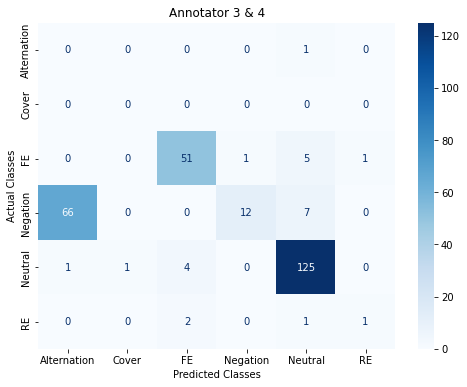

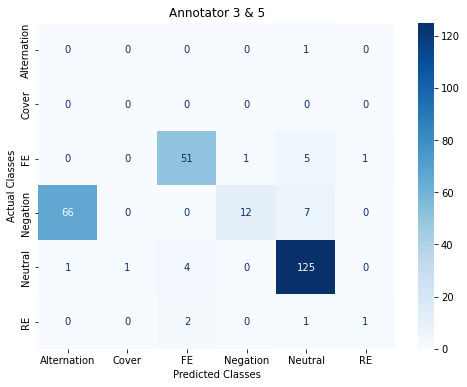

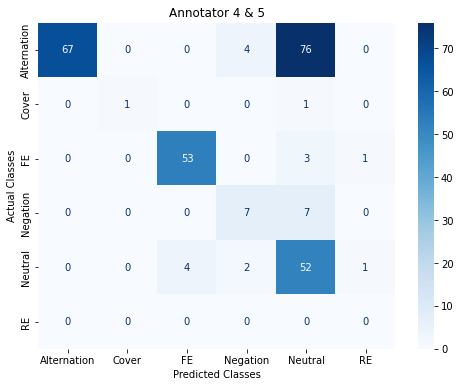

In [169]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
cm[('R', 'S')].plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 3 & 4")
plt.savefig('blocks_273_42_1131_ann34.png', dpi=100)
cm[('R', 'S')].plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 3 & 5")
plt.savefig('blocks_273_42_1131_ann35.png', dpi=100)

cm[('H', 'S')].plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 4 & 5")
plt.savefig('blocks_273_42_1131_ann45.png', dpi=100)

In [194]:
block_123 = block_123.rename(columns={'Part of Premise/Hypothesis Modified':'Modified SUBJ/VERB/OBJECT'})
res = block_123.groupby(['Modified SUBJ/VERB/OBJECT', 'R', 'H', 'S']).count().reset_index()[[ 'Quantifier Type', 'Modified SUBJ/VERB/OBJECT', 'R', 'H','S','Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Modified SUBJ/VERB/OBJECT','R', 'H','S','Quantifier Type']]
r= r.rename(columns={ 'Quantifier Type':'Count'})
print("****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 & 3 ******** ")
r

****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 & 3 ******** 


,Modified SUBJ/VERB/OBJECT,R,H,S,Count
10,Object,Neutral,Alternation,Neutral,38
7,Object,Negation,Alternation,Alternation,31
24,Subject,Neutral,Alternation,Neutral,27
19,Subject,Negation,Alternation,Alternation,26
29,Subject,Neutral,Neutral,Neutral,21
3,Object,FE,FE,FE,21
16,Subject,FE,FE,FE,21
38,Verb,Neutral,Neutral,Neutral,15
36,Verb,Neutral,Alternation,Neutral,10
33,Verb,Negation,Alternation,Alternation,9


In [195]:
r.to_excel("block_123_modifier_counts.xlsx")

In [172]:
block_123['Quantifier Type'].value_counts()

Adjectives/Adverbs    126
Existential            63
Universal              45
Negation               36
NONE                    9
Name: Quantifier Type, dtype: int64

In [173]:
block_123['Modified SUBJ/VERB/OBJECT'].value_counts()

Subject    117
Object     108
Verb        45
NONE         9
Name: Modified SUBJ/VERB/OBJECT, dtype: int64

In [174]:
r = block_123.groupby(['R', 'H','S']).count().reset_index()[['R', 'H','S',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,R,H,S,Count
19,4,5,4,75
14,3,5,5,66
0,1,1,1,51
18,4,4,4,43
9,3,3,3,7
16,4,3,4,7
11,3,4,4,6
12,3,5,3,4
17,4,4,1,3
2,1,1,4,3


In [175]:
rev_label_map = {v:k for k,v in label_map.items()}
for i in ['R', 'H', 'S']:
  block_123[i] = block_123[i].map(rev_label_map)

In [183]:
res3 = block_123.groupby(['Quantifier Type','R','H']).count().reset_index()
result = res3[['Quantifier Type','R','H', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for two annotators 3 & 4 are: ******")
result = result.rename(columns={"Premise/Hypothesis/Both":"Counts"})
result[result['R'] != result['H']].sort_values(by="Counts", ascending =False)

****** The confused predictions for each modifier for two annotators 3 & 4 are: ******


,Quantifier Type,R,H,Counts
2,Adjectives/Adverbs,Neutral,Alternation,48
1,Adjectives/Adverbs,Negation,Alternation,42
9,Existential,Neutral,Alternation,19
6,Existential,Negation,Alternation,16
24,Universal,Negation,Alternation,11
26,Universal,Neutral,Alternation,8
17,Negation,Negation,Neutral,5
28,Universal,Neutral,Negation,4
10,Existential,Neutral,Negation,3
5,Existential,FE,Neutral,2


In [184]:
result[result['R'] != result['H']].sort_values(by="Counts", ascending =False).to_excel("blocks_273_342_1131_ann34.xlsx")

In [186]:
res3 = block_123.groupby(['Quantifier Type','R','S']).count().reset_index()
result = res3[['Quantifier Type','R','S', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for two annotators 3 & 5 are: ******")
result = result.rename(columns={"Premise/Hypothesis/Both":"Counts"})
result[result['R'] != result['S']].sort_values(by="Counts", ascending =False)

****** The confused predictions for each modifier for two annotators 3 & 5 are: ******


,Quantifier Type,R,S,Counts
1,Adjectives/Adverbs,Negation,Alternation,42
5,Existential,Negation,Alternation,16
24,Universal,Negation,Alternation,8
4,Existential,FE,Neutral,5
16,Negation,Negation,Neutral,4
7,Existential,Negation,Neutral,2
17,Negation,Neutral,FE,2
30,Universal,RE,FE,1
28,Universal,Neutral,FE,1
27,Universal,Neutral,Cover,1


In [187]:
result[result['R'] != result['S']].sort_values(by="Counts", ascending =False).to_excel("blocks_273_342_1131_ann35.xlsx")

In [188]:
res3 = block_123.groupby(['Quantifier Type','H','S']).count().reset_index()
result = res3[['Quantifier Type','H','S', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for two annotators 4 & 5 are: ******")
result = result.rename(columns={"Premise/Hypothesis/Both":"Counts"})
result[result['H'] != result['S']].sort_values(by="Counts", ascending =False)

****** The confused predictions for each modifier for two annotators 4 & 5 are: ******


,Quantifier Type,H,S,Counts
1,Adjectives/Adverbs,Alternation,Neutral,48
5,Existential,Alternation,Neutral,18
24,Universal,Alternation,Neutral,9
30,Universal,Negation,Neutral,4
7,Existential,FE,Neutral,3
9,Existential,Negation,Neutral,3
15,Negation,Alternation,Negation,2
18,Negation,Neutral,FE,2
19,Negation,Neutral,Negation,2
23,Universal,Alternation,Negation,2


In [189]:
result[result['H'] != result['S']].sort_values(by="Counts", ascending =False).to_excel("blocks_273_342_1131_ann45.xlsx")

# Blocks : 751

SICK_id 751:
Premise: A classroom is full of students	,	Hypothesis: A classroom is empty. Label: Contradiction

In [196]:
block_13['SICK_id'] = block_13['SICK_id'].astype('int')

block_13.head(), block_13['R'].unique(), block_13['S'].unique()

(   SICK_id                              Premise                Hypothesis  \
 0      751      a classroom is full of students      a classroom is empty   
 1      751  every classroom is full of students      a classroom is empty   
 2      751      a classroom is full of students  every classroom is empty   
 3      751  every classroom is full of students  every classroom is empty   
 4      751   some classroom is full of students      a classroom is empty   
 
   Modifier Premise/Hypothesis/Both Part of Premise/Hypothesis Modified  \
 0     NONE                    NONE                                NONE   
 1    every                 Premise                             Subject   
 2    every              Hypothesis                             Subject   
 3    every                    Both                             Subject   
 4     some                 Premise                             Subject   
 
              R            S  
 0     Negation     Negation  
 1     Negation 

In [197]:
block_13['R'].value_counts()

Negation       44
Neutral        19
Alternation     7
FE              7
Cover           1
Name: R, dtype: int64

In [198]:
block_13['S'].value_counts()

Alternation    57
Neutral        12
Negation        9
Name: S, dtype: int64

In [200]:
block_13['SICK_id'].unique()

array([751])

In [202]:
lmap = {1:'FE', 2:'RE', 3:'Negation', 4:'Neutral', 5:'Alternation', 6:'Equivalence', 7:'Cover'}

In [203]:
label_map = {'FE':1, 'RE':2, 'Negation':3, 'Neutral':4, 'Alternation':5, 'Equivalence':6, 'Cover':7}

In [204]:
for i in ['R', 'S']:
  block_13[i] = block_13[i].map(label_map)

In [205]:
block_13['R'][block_13['R'].isna()], block_13['S'][block_13['S'].isna()], block_13.shape[0]

(Series([], Name: R, dtype: int64), Series([], Name: S, dtype: int64), 78)

### Cohen Kappa Score
A pairwise inetr-rater reliability statistic. 
Considering probability of agreement by chance.
We have 7 labels and 2 annotators and 78 observations in total.
So labels are mutually exclusive. (Assume so for now)
$p_0$ relative observed agreement
$p_1$ hypothetical agreement by chance
$p_0 = \frac{1}{78^2} \sum n_{k_1} n_{k_2} $  where $n_{k_1}$ and $n_{k_2}$ are number of times rater i (first or second) labelled k. 

These scores are calculated pairwise so at any time it is agreement between two raters. 3 & 5 - 7.52% agreement.

In [207]:
labellers = {1:'R', 2:'S'}
cohen_kappa_scores = {}

cohen_kappa_scores[(labellers[1], labellers[2])] = cohen_kappa_score(block_13[labellers[1]], block_13[labellers[2]])
print(cohen_kappa_scores[(labellers[1], labellers[2])])

0.07528156490812099


### Label-wise agreements (as a confusion matrix)
- First we'd like to assess the maximum agreement between each pair of annotators for each label they labelled.

In [208]:
from pycm import *

cm = ConfusionMatrix(actual_vector=block_13['R'].to_numpy(), predict_vector=block_13['S'].to_numpy(), is_imbalanced=True) 

## Seeing maximum agreement for the label that was chosen most of the times for just two annotators.

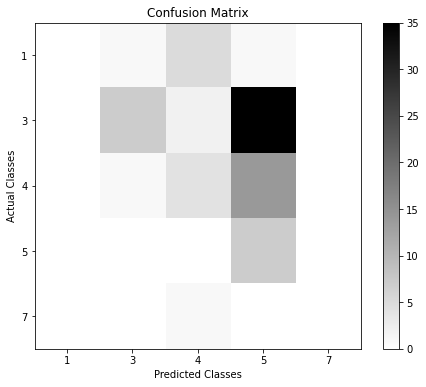

In [209]:
cm.plot()

In [210]:
cm.print_matrix()

Predict  1        3        4        5        7        
Actual
1        0        1        5        1        0        

3        0        7        2        35       0        

4        0        1        4        14       0        

5        0        0        0        7        0        

7        0        0        1        0        0        




In [211]:
cm.table

{1: {1: 0, 3: 1, 4: 5, 5: 1, 7: 0},
 3: {1: 0, 3: 7, 4: 2, 5: 35, 7: 0},
 4: {1: 0, 3: 1, 4: 4, 5: 14, 7: 0},
 5: {1: 0, 3: 0, 4: 0, 5: 7, 7: 0},
 7: {1: 0, 3: 0, 4: 1, 5: 0, 7: 0}}

In [213]:
label_map

{'FE': 1,
 'RE': 2,
 'Negation': 3,
 'Neutral': 4,
 'Alternation': 5,
 'Equivalence': 6,
 'Cover': 7}

In [215]:
a1_counts = {}
for k, v in block_13['R'].value_counts().to_dict().items():
  a1_counts[lmap[k]] = v
a1_counts

{'Negation': 44, 'Neutral': 19, 'Alternation': 7, 'FE': 7, 'Cover': 1}

In [216]:
a2_counts = {}
for k, v in block_13['S'].value_counts().to_dict().items():
  a2_counts[lmap[k]] = v
a2_counts

{'Alternation': 57, 'Neutral': 12, 'Negation': 9}

In [217]:
sum_counts = {}
for key in ['Alternation','Neutral','Negation' ]:
  sum_counts[key] = a1_counts[key] + a2_counts[key]
sum_counts['FE'] = a1_counts['FE']
sum_counts['Cover'] = a1_counts['Cover']
sum_counts

{'Alternation': 64, 'Neutral': 31, 'Negation': 53, 'FE': 7, 'Cover': 1}

### Observing F1, precision and recall scores for pairwise confusion matrices.
In this case, we consider a case where each annotator i can be Gold label annotator and compared with every other annotator j from remaining 1 annotators. So we consider the case that chosen Gold labels i.e. annotator's labels as Ground truth and we calculate pairwise "Supposed Gold label" with another annotator's labels. 

This is to say between any two annotators, we choose any one annotator, we would like to see how much agreement can exist and how would that reflect as F1, precision and recall scores.

- For each pair of annotators, consider ith annotator to have ground truth and jth annotator to be prediction labels.
- We still observe maximum agreement < 50% for FE Labels.
- We do observ ~23.07% precision, recall and F1-scores. Would not be very helpful, since we do not have "True Gold labels". 
- We use the following information for assessing how to design annotation schemes annotating automatically modified premise, hypothesis sentences with Generalized quantifiers as well as Adjectives & adverbs.
- We want to observe the amount of labeling confusion that quantifiers and modifiers introduce.
- We consider that wherever the label is not FE or RE, we can see maximum confusion. 
- Neutral - has second best agreement & is second most chosen label
- Forward Entailment - has max best agreement & is also second most chosen label
- All other cases, signify confusion due to level of difficulty.

Total 78 * 2 = 156 labels required by 2 annotators for 78 premise, hypothesis pairs.

- 'FE': 7,
- 'RE': 0,
- 'Neutral': 31,
- 'Negation': 53,
- 'Alternation': 64,
- 'Cover': 1


In [219]:

cm = {}

cm[('R', 'S')] = ConfusionMatrix(actual_vector=block_13['R'].to_numpy(), predict_vector=block_13['S'].to_numpy())
cm[('S','R')] = ConfusionMatrix(actual_vector=block_13['S'].to_numpy(), predict_vector=block_13['R'].to_numpy())
print(cm[('R', 'S')])
print(cm[('S','R')])

Predict  1        3        4        5        7        
Actual
1        0        1        5        1        0        

3        0        7        2        35       0        

4        0        1        4        14       0        

5        0        0        0        7        0        

7        0        0        1        0        0        





Overall Statistics : 

95% CI                                                            (0.13727,0.32427)
ACC Macro                                                         0.69231
ARI                                                               0.11597
AUNP                                                              0.55068
AUNU                                                              0.5471
Bangdiwala B                                                      0.11144
Bennett S                                                         0.03846
CBA                                                               0.09848
CSI                           

### Looking at total agreement counts for each label between each pair of annotators.
- Max agreement is for FE, then Neutral.
- But we cannot say if agreement was most, complexity to identify each of these three labels was easy.

In [220]:
for k,v in cm.items():
  print(k)
  print(v.table)

('R', 'S')
{1: {1: 0, 3: 1, 4: 5, 5: 1, 7: 0}, 3: {1: 0, 3: 7, 4: 2, 5: 35, 7: 0}, 4: {1: 0, 3: 1, 4: 4, 5: 14, 7: 0}, 5: {1: 0, 3: 0, 4: 0, 5: 7, 7: 0}, 7: {1: 0, 3: 0, 4: 1, 5: 0, 7: 0}}
('S', 'R')
{1: {1: 0, 3: 0, 4: 0, 5: 0, 7: 0}, 3: {1: 1, 3: 7, 4: 1, 5: 0, 7: 0}, 4: {1: 5, 3: 2, 4: 4, 5: 0, 7: 1}, 5: {1: 1, 3: 35, 4: 14, 5: 7, 7: 0}, 7: {1: 0, 3: 0, 4: 0, 5: 0, 7: 0}}


## Cohen Kappa scores for modified labels 

Total 78 * 2 = 156 labels required by 2 annotators for 78 premise, hypothesis pairs.

- 'FE': 7,
- 'RE': 0,
- 'Neutral': 31,
- 'Negation': 53,
- 'Alternation': 64,
- 'Cover': 1

So we recalculate the Cohen kappa score which is now: 7.52%.

In [222]:
labellers = {1:'R', 2:'S'}
cohen_kappa_scores_modified = {}

cohen_kappa_scores_modified[(labellers[1], labellers[2])] = cohen_kappa_score(block_13[labellers[1]], block_13[labellers[2]])
print(cohen_kappa_scores_modified[(labellers[1], labellers[2])])

0.07528156490812099


## Fleiss Kappa scores
This is another way of finding above the level of agreement expected by chance. This considers random sampling among the raters (a little better than voted ratings, due to "randomness").
Although this is purely statistical, since we have types of modifiers which influence thge rater's choice of label, we consider this for some "randomized" assessment for a approximated agreement scores. 

The score considers that if no one chose "this" label, we could still find out expected chance of agreement on "this" label.

This does not tell if agreement is good enough. But just that if an agreement exists then how better is it to that of agreement by chance which in this case is -14%.

In [224]:
from statsmodels.stats import inter_rater as irr
data, categories = irr.aggregate_raters(block_13[['R','S']].to_numpy())
irr.fleiss_kappa(data, method='fleiss')

-0.14007308160779527

### Krippendorff's Alpha
Essentially measures amount of reliability as a measure of disagreement.
However this might not be relevant here, since we do not have concrete Ground truth. But if we did assume we did have Ground truth and this was reliable, this is how much reliable these labels based on agreement calculated from ratio of observed disagreement and disagreement expected by chance can be.

Here krippendorff's alpha is 77.86%

In [225]:
import krippendorff
krippendorff.alpha(block_13[['R','S']].to_numpy().T)

-0.21640903686087998

In [226]:
import agreement
from agreement.utils.kernels import linear_kernel

from agreement.metrics import cohens_kappa, krippendorffs_alpha, scotts_pi
from agreement.utils.transform import pivot_table_frequency


In [228]:
this_array = []
for i,l in enumerate(block_13[['R','S']].to_numpy()):
  for k in range(0,2):
    this_array.append([i,k+1, l[k]])
arr = np.array(this_array)
questions_answers_table = pivot_table_frequency(arr[:, 0], arr[:, 2])

### Recomputing Cohen's kappa, krippendorff's alpha while calculating Scott's pi

Scott's Pi is similar to Cohen's kappa, except it considered squared joint proportions to calculate inter-annotator reliability.

In this case, Scott's pi is -0.14% different from Cohen's kappa

In [229]:
users_answers_table = pivot_table_frequency(arr[:, 1], arr[:, 2])
kappa = cohens_kappa(questions_answers_table, users_answers_table)
weighted_kappa = cohens_kappa(questions_answers_table, users_answers_table, weights_kernel=linear_kernel)

alpha = krippendorffs_alpha(questions_answers_table)
pi = scotts_pi(questions_answers_table)

In [230]:
kappa, weighted_kappa, alpha, pi

(0.07528156490812091,
 0.05969101123595467,
 -0.13276492082825814,
 -0.14007308160779527)

## Agreements based on Quantifier & Modified SVO

In [ ]:
u = ["every", "always", "never", "everyone of"]
e = ["some", "at least", "exactly one", "all but one"]
n = ["not every", "no", "not"]
adj = ["green", "happy", "sad", "good", "bad", "abnormally", "elegantly", "an elegant", "an abnormal"]

In [231]:
def get_quantifier_type(x):
  if x in u:
    return "Universal"
  elif x in e:
    return "Existential"
  elif x in n:
    return "Negation"
  elif x in adj:
    return "Adjectives/Adverbs"
  else:
    return "NONE"

In [232]:
block_13['Quantifier Type'] = block_13['Modifier'].apply(lambda x: get_quantifier_type(x)  )
block_13

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,R,S,Quantifier Type
0,751,a classroom is full of students,a classroom is empty,NONE,NONE,NONE,3,3,NONE
1,751,every classroom is full of students,a classroom is empty,every,Premise,Subject,3,5,Universal
2,751,a classroom is full of students,every classroom is empty,every,Hypothesis,Subject,3,5,Universal
3,751,every classroom is full of students,every classroom is empty,every,Both,Subject,3,3,Universal
4,751,some classroom is full of students,a classroom is empty,some,Premise,Subject,5,5,Existential
...,...,...,...,...,...,...,...,...,...
73,751,A classroom is full of students,A classroom is sad empty,sad,Hypothesis,Object,3,5,Adjectives/Adverbs
74,751,A classroom is full of sad students,A classroom is sad empty,sad,Both,Object,3,5,Adjectives/Adverbs
75,751,A classroom is full of an elegant students,A classroom is empty,an elegant,Premise,Object,3,5,Adjectives/Adverbs
76,751,A classroom is full of students,A classroom is an elegant empty,an elegant,Hypothesis,Object,3,5,Adjectives/Adverbs


In [234]:
cm_one_way = ConfusionMatrix(actual_vector=block_13['R'].to_list(), predict_vector=block_13['S'].to_list(), classes=lmap)
cm_two_way = ConfusionMatrix(actual_vector=block_13['S'].to_list(), predict_vector=block_13['R'].to_list(), classes=lmap)
cm_one_way.relabel(mapping= {k:lmap[k] for k in cm_one_way.classes})
cm_two_way.relabel(mapping= {k:lmap[k] for k in cm_two_way.classes})
cp = Compare({"R_S":cm_one_way,"S_R":cm_two_way})
print(cp)

Best : R_S

Rank  Name   Class-Score       Overall-Score
1     R_S    0.18833           0.21944
2     S_R    0.17167           0.21944



/usr/local/lib/python3.8/dist-packages/pycm/pycm_util.py:401: RuntimeWarning: The classes is neither a list nor None so it'll be ignored.
  warn(CLASSES_TYPE_WARNING, RuntimeWarning)


In [235]:
lmap

{1: 'FE',
 2: 'RE',
 3: 'Negation',
 4: 'Neutral',
 5: 'Alternation',
 6: 'Equivalence',
 7: 'Cover'}

In [236]:
cp.best, cp.sorted, cp.best_name

(pycm.ConfusionMatrix(classes: ['Alternation', 'Cover', 'FE', 'Negation', 'Neutral']),
 ['R_S', 'S_R'],
 'R_S')

In [237]:
cm_one_way.classes, cm_two_way.classes

(['Alternation', 'Cover', 'FE', 'Negation', 'Neutral'],
 ['Alternation', 'Cover', 'FE', 'Negation', 'Neutral'])

### Seeing the Confusion matrix density plots for Max agreement between each pair of annotators.

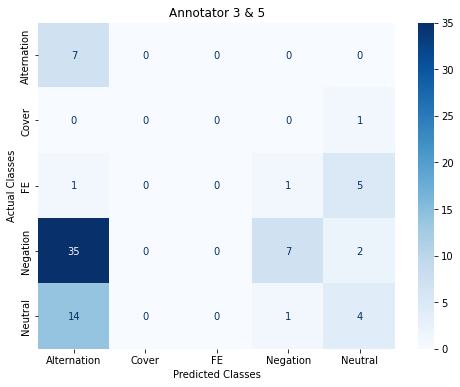

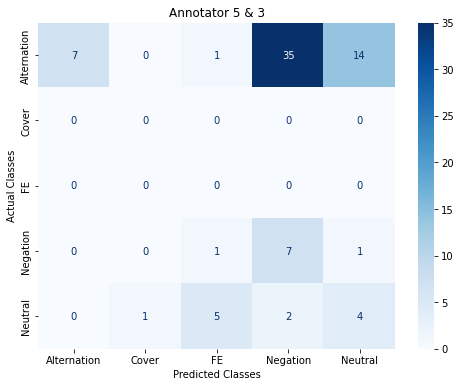

In [238]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
cm_one_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 3 & 5")
plt.savefig('blocks_751_ann35.png', dpi=100)
cm_two_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 5 & 3")
plt.savefig('blocks_751_ann53.png', dpi=100)

In [250]:
block_13 = block_13.rename(columns={'Part of Premise/Hypothesis Modified':'Modified SUBJ/VERB/OBJECT'})
res = block_13.groupby(['Modified SUBJ/VERB/OBJECT', 'R', 'S']).count().reset_index()[[ 'Quantifier Type', 'Modified SUBJ/VERB/OBJECT', 'R', 'S','Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Modified SUBJ/VERB/OBJECT','R', 'S','Quantifier Type']]
r= r.rename(columns={ 'Quantifier Type':'Count'})
print("****** Counts for Modified SUBJ/VERB/OBJECT and annotators 3 & 5 ******** ")
r

****** Counts for Modified SUBJ/VERB/OBJECT and annotators 3 & 5 ******** 


,Modified SUBJ/VERB/OBJECT,R,S,Count
1,Object,Negation,Alternation,21
9,Subject,Neutral,Alternation,14
13,Verb,Negation,Alternation,9
2,Subject,Alternation,Alternation,7
7,Subject,Negation,Alternation,5
8,Subject,Negation,Negation,4
0,NONE,Negation,Negation,3
11,Subject,Neutral,Neutral,3
12,Verb,FE,Neutral,3
6,Subject,FE,Neutral,2


In [251]:
r.to_excel("block_751_35_modifier.xlsx")

In [241]:
block_13['Quantifier Type'].value_counts()

Adjectives/Adverbs    42
Universal             12
Existential           12
Negation               9
NONE                   3
Name: Quantifier Type, dtype: int64

In [242]:
block_13['Modified SUBJ/VERB/OBJECT'].value_counts()

Subject    39
Object     21
Verb       15
NONE        3
Name: Modified SUBJ/VERB/OBJECT, dtype: int64

In [244]:
r = block_13.groupby(['R', 'S',]).count().reset_index()[['R', 'S',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,R,S,Count
5,3,5,35
8,4,5,14
3,3,3,7
9,5,5,7
1,1,4,5
7,4,4,4
4,3,4,2
0,1,3,1
2,1,5,1
6,4,3,1


In [245]:
rev_label_map = {v:k for k,v in label_map.items()}
for i in ['R', 'S']:
  block_13[i] = block_13[i].map(rev_label_map)

In [247]:
res3 = block_13.groupby(['Quantifier Type','R','S']).count().reset_index()
result = res3[['Quantifier Type','R','S', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for two annotators are: ******")
result = result.rename(columns={"Premise/Hypothesis/Both":"Counts"})
result[result['R'] != result['S']].sort_values(by="Counts", ascending =False)

****** The confused predictions for each modifier for two annotators are: ******


,Quantifier Type,R,S,Counts
0,Adjectives/Adverbs,Negation,Alternation,30
1,Adjectives/Adverbs,Neutral,Alternation,12
13,Universal,Negation,Alternation,5
9,Negation,FE,Neutral,4
5,Existential,Neutral,Alternation,2
3,Existential,FE,Alternation,1
4,Existential,FE,Negation,1
6,Existential,Neutral,Negation,1
8,Negation,Cover,Neutral,1
10,Negation,Negation,Neutral,1


In [248]:
result[result['R'] != result['S']].sort_values(by="Counts", ascending =False).to_excel("block_751_35_quantifier.xlsx")

# Blocks : 455
SICK_id 455:
Premise: Two children are hanging on a large branch	Hypothesis: Two children are climbing a tree. Label:  Entailment

In [253]:
block_23['SICK_id'] = block_23['SICK_id'].astype('int')

block_23.head(), block_23['H'].unique(), block_23['S'].unique()

(   SICK_id                                           Premise  \
 0      455        two children are hanging on a large branch   
 1      455  every two children are hanging on a large branch   
 2      455        two children are hanging on a large branch   
 3      455  every two children are hanging on a large branch   
 4      455   some two children are hanging on a large branch   
 
                                Hypothesis Modifier Premise/Hypothesis/Both  \
 0        two children are climbing a tree     NONE                    NONE   
 1        two children are climbing a tree    every                 Premise   
 2  every two children are climbing a tree    every              Hypothesis   
 3  every two children are climbing a tree    every                    Both   
 4        two children are climbing a tree     some                 Premise   
 
   Part of Premise/Hypothesis Modified      H        S  
 0                                NONE     FE       FE  
 1                

In [254]:
block_23['H'].value_counts()

FE             57
Neutral        29
Alternation     5
Cover           2
Name: H, dtype: int64

In [255]:
block_23['S'].value_counts()

FE             48
Neutral        36
Negation        3
Alternation     3
RE              2
Cover           1
Name: S, dtype: int64

In [256]:
block_23['SICK_id'].unique()

array([455])

In [267]:
lmap = {1:'FE', 2:'RE', 3:'Negation', 4:'Neutral', 5:'Alternation', 6:'Equivalence', 7:'Cover'}

In [257]:
label_map = {'FE':1, 'RE':2, 'Negation':3, 'Neutral':4, 'Alternation':5, 'Equivalence':6, 'Cover':7}

In [258]:
for i in ['H', 'S']:
  block_23[i] = block_23[i].map(label_map)

In [259]:
block_23['S'][block_23['S'].isna()], block_23['H'][block_23['H'].isna()], block_23.shape[0]

(Series([], Name: S, dtype: int64), Series([], Name: H, dtype: int64), 93)

### Cohen Kappa Score
A pairwise inetr-rater reliability statistic. 
Considering probability of agreement by chance.
We have 7 labels and 2 annotators and 43 observations in total.
So labels are mutually exclusive. (Assume so for now)
$p_0$ relative observed agreement
$p_1$ hypothetical agreement by chance
$p_0 = \frac{1}{43^2} \sum n_{k_1} n_{k_2} $  where $n_{k_1}$ and $n_{k_2}$ are number of times rater i (first or second) labelled k. 

These scores are calculated pairwise so at any time it is agreement between two raters. 34.83%

In [261]:
labellers = {1:'H', 2:'S'}
cohen_kappa_scores = {}

cohen_kappa_scores[(labellers[1], labellers[2])] = cohen_kappa_score(block_23[labellers[1]], block_23[labellers[2]])
print(cohen_kappa_scores[(labellers[1], labellers[2])])

0.34830997526793084


### Label-wise agreements (as a confusion matrix)
- First we'd like to assess the maximum agreement between each pair of annotators for each label they labelled.

In [262]:
from pycm import *

cm = ConfusionMatrix(actual_vector=block_23['H'].to_numpy(), predict_vector=block_23['S'].to_numpy(), is_imbalanced=True) 

## Seeing maximum agreement for the label that was chosen most of the times for just two annotators.

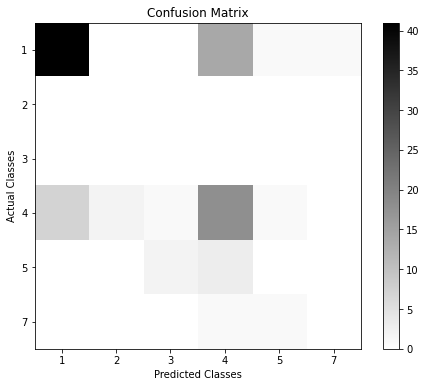

In [263]:
cm.plot()

In [264]:
cm.print_matrix()

Predict  1        2        3        4        5        7        
Actual
1        41       0        0        14       1        1        

2        0        0        0        0        0        0        

3        0        0        0        0        0        0        

4        7        2        1        18       1        0        

5        0        0        2        3        0        0        

7        0        0        0        1        1        0        




In [265]:
cm.table

{1: {1: 41, 2: 0, 3: 0, 4: 14, 5: 1, 7: 1},
 2: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0},
 3: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0},
 4: {1: 7, 2: 2, 3: 1, 4: 18, 5: 1, 7: 0},
 5: {1: 0, 2: 0, 3: 2, 4: 3, 5: 0, 7: 0},
 7: {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 7: 0}}

In [266]:
label_map

{'FE': 1,
 'RE': 2,
 'Negation': 3,
 'Neutral': 4,
 'Alternation': 5,
 'Equivalence': 6,
 'Cover': 7}

In [268]:
a1_counts = {}
for k, v in block_23['H'].value_counts().to_dict().items():
  a1_counts[lmap[k]] = v
a1_counts

{'FE': 57, 'Neutral': 29, 'Alternation': 5, 'Cover': 2}

In [269]:
a2_counts = {}
for k, v in block_23['S'].value_counts().to_dict().items():
  a2_counts[lmap[k]] = v
a2_counts

{'FE': 48, 'Neutral': 36, 'Negation': 3, 'Alternation': 3, 'RE': 2, 'Cover': 1}

In [271]:
sum_counts = {}
for key in ['FE','Cover', 'Neutral', 'Alternation' ]:
  sum_counts[key] = a1_counts[key] + a2_counts[key]
sum_counts['Negation'] = a2_counts['Negation']
sum_counts['RE'] = a2_counts['RE']
sum_counts

{'FE': 105,
 'Cover': 3,
 'Neutral': 65,
 'Alternation': 8,
 'Negation': 3,
 'RE': 2}

### Observing F1, precision and recall scores for pairwise confusion matrices.
In this case, we consider a case where each annotator i can be Gold label annotator and compared with every other annotator j from remaining 1 annotators. So we consider the case that chosen Gold labels i.e. annotator's labels as Ground truth and we calculate pairwise "Supposed Gold label" with another annotator's labels. 

This is to say between any two annotators, we choose any one annotator, we would like to see how much agreement can exist and how would that reflect as F1, precision and recall scores.

- For each pair of annotators, consider ith annotator to have ground truth and jth annotator to be prediction labels.
- We still observe maximum agreement >50% for FE & Neutral Labels.
- We do observ ~63.44% F1-scores. Would not be very helpful, since we do not have "True Gold labels". 
- We use the following information for assessing how to design annotation schemes annotating automatically modified premise, hypothesis sentences with Generalized quantifiers as well as Adjectives & adverbs.
- We want to observe the amount of labeling confusion that quantifiers and modifiers introduce.
- We consider that wherever the label is not FE or RE, we can see maximum confusion. 
- Neutral - has second best agreement & is second most chosen label
- Forward Entailment - has max best agreement & is also second most chosen label
- All other cases, signify confusion due to level of difficulty.

Total 93 * 2 = 186 labels required by 2 annotators for 93 premise, hypothesis pairs.

- 'FE': 105,
- 'RE': 2,
- 'Neutral': 65,
- 'Negation': 3,
- 'Alternation': 8,
- 'Cover': 3


In [272]:

cm = {}

cm[('H', 'S')] = ConfusionMatrix(actual_vector=block_23['H'].to_numpy(), predict_vector=block_23['S'].to_numpy())
cm[('S','H')] = ConfusionMatrix(actual_vector=block_23['S'].to_numpy(), predict_vector=block_23['H'].to_numpy())
print(cm[('H', 'S')])
print(cm[('S','H')])

Predict  1        2        3        4        5        7        
Actual
1        41       0        0        14       1        1        

2        0        0        0        0        0        0        

3        0        0        0        0        0        0        

4        7        2        1        18       1        0        

5        0        0        2        3        0        0        

7        0        0        0        1        1        0        





Overall Statistics : 

95% CI                                                            (0.53653,0.73229)
ACC Macro                                                         0.87814
ARI                                                               0.24515
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.52805
Bennett S                                                       

### Looking at total agreement counts for each label between each pair of annotators.
- Max agreement is for FE, then Neutral.
- But we cannot say if agreement was most, complexity to identify each of these three labels was easy.

In [273]:
for k,v in cm.items():
  print(k)
  print(v.table)

('H', 'S')
{1: {1: 41, 2: 0, 3: 0, 4: 14, 5: 1, 7: 1}, 2: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}, 3: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}, 4: {1: 7, 2: 2, 3: 1, 4: 18, 5: 1, 7: 0}, 5: {1: 0, 2: 0, 3: 2, 4: 3, 5: 0, 7: 0}, 7: {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 7: 0}}
('S', 'H')
{1: {1: 41, 2: 0, 3: 0, 4: 7, 5: 0, 7: 0}, 2: {1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 7: 0}, 3: {1: 0, 2: 0, 3: 0, 4: 1, 5: 2, 7: 0}, 4: {1: 14, 2: 0, 3: 0, 4: 18, 5: 3, 7: 1}, 5: {1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 7: 1}, 7: {1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}}


## Cohen Kappa scores for modified labels 

Total 186 * 2 = 372 labels required by 2 annotators for 186 premise, hypothesis pairs.

- 'FE': 105,
- 'RE': 2,
- 'Neutral': 65,
- 'Negation': 3,
- 'Alternation': 8,
- 'Cover': 3

So we recalculate the Cohen kappa score which is now: 34.83%.

In [274]:
labellers = {1:'H', 2:'S'}
cohen_kappa_scores_modified = {}

cohen_kappa_scores_modified[(labellers[1], labellers[2])] = cohen_kappa_score(block_23[labellers[1]], block_23[labellers[2]])
print(cohen_kappa_scores_modified[(labellers[1], labellers[2])])

0.34830997526793084


## Fleiss Kappa scores
This is another way of finding above the level of agreement expected by chance. This considers random sampling among the raters (a little better than voted ratings, due to "randomness").
Although this is purely statistical, since we have types of modifiers which influence thge rater's choice of label, we consider this for some "randomized" assessment for a approximated agreement scores. 

The score considers that if no one chose "this" label, we could still find out expected chance of agreement on "this" label.

This does not tell if agreement is good enough. But just that if an agreement exists then how better is it to that of agreement by chance which in this case is 34.33%.

In [275]:
from statsmodels.stats import inter_rater as irr
data, categories = irr.aggregate_raters(block_23[['H','S']].to_numpy())
irr.fleiss_kappa(data, method='fleiss')

0.3433021806853582

### Krippendorff's Alpha
Essentially measures amount of reliability as a measure of disagreement.
However this might not be relevant here, since we do not have concrete Ground truth. But if we did assume we did have Ground truth and this was reliable, this is how much reliable these labels based on agreement calculated from ratio of observed disagreement and disagreement expected by chance can be.

Here krippendorff's alpha is 44.27%

In [276]:
import krippendorff
krippendorff.alpha(block_23[['H','S']].to_numpy().T)

0.4427771875444958

In [277]:
import agreement
from agreement.utils.kernels import linear_kernel

from agreement.metrics import cohens_kappa, krippendorffs_alpha, scotts_pi
from agreement.utils.transform import pivot_table_frequency


In [278]:
this_array = []
for i,l in enumerate(block_23[['H','S']].to_numpy()):
  for k in range(0,2):
    this_array.append([i,k+1, l[k]])
arr = np.array(this_array)
questions_answers_table = pivot_table_frequency(arr[:, 0], arr[:, 2])

### Recomputing Cohen's kappa, krippendorff's alpha while calculating Scott's pi

Scott's Pi is similar to Cohen's kappa, except it considered squared joint proportions to calculate inter-annotator reliability.

In this case, Scott's pi is 34.33% different from Cohen's kappa

In [279]:
users_answers_table = pivot_table_frequency(arr[:, 1], arr[:, 2])
kappa = cohens_kappa(questions_answers_table, users_answers_table)
weighted_kappa = cohens_kappa(questions_answers_table, users_answers_table, weights_kernel=linear_kernel)

alpha = krippendorffs_alpha(questions_answers_table)
pi = scotts_pi(questions_answers_table)

In [280]:
kappa, weighted_kappa, alpha, pi

(0.3483099752679308,
 0.4143409188492925,
 0.34683281412253364,
 0.34330218068535817)

## Agreements based on Quantifier & Modified SVO

In [281]:
u = ["every", "always", "never", "everyone of"]
e = ["some", "at least", "exactly one", "all but one"]
n = ["not every", "no", "not"]
adj = ["green", "happy", "sad", "good", "bad", "abnormally", "elegantly", "an elegant", "an abnormal"]

In [282]:
def get_quantifier_type(x):
  if x in u:
    return "Universal"
  elif x in e:
    return "Existential"
  elif x in n:
    return "Negation"
  elif x in adj:
    return "Adjectives/Adverbs"
  else:
    return "NONE"

In [283]:
block_23['Quantifier Type'] = block_23['Modifier'].apply(lambda x: get_quantifier_type(x)  )
block_23

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,H,S,Quantifier Type
0,455,two children are hanging on a large branch,two children are climbing a tree,NONE,NONE,NONE,1,1,NONE
1,455,every two children are hanging on a large branch,two children are climbing a tree,every,Premise,Subject,1,1,Universal
2,455,two children are hanging on a large branch,every two children are climbing a tree,every,Hypothesis,Subject,7,4,Universal
3,455,every two children are hanging on a large branch,every two children are climbing a tree,every,Both,Subject,1,1,Universal
4,455,some two children are hanging on a large branch,two children are climbing a tree,some,Premise,Subject,1,1,Existential
...,...,...,...,...,...,...,...,...,...
88,455,Two children are hanging on a large branch,Two children are climbing exactly one tree,exactly one,Hypothesis,Object,4,1,Existential
89,455,Two children are hanging on exactly one large ...,Two children are climbing exactly one tree,exactly one,Both,Object,1,4,Existential
90,455,Two children are hanging on an elegant large b...,Two children are climbing a tree\n,an elegant,Premise,Object,1,1,Adjectives/Adverbs
91,455,Two children are hanging on a large branch,Two children are climbing a an elegant tree,an elegant,Hypothesis,Object,4,4,Adjectives/Adverbs


In [286]:
cm_one_way = ConfusionMatrix(actual_vector=block_23['H'].to_list(), predict_vector=block_23['S'].to_list(), classes=lmap)
cm_two_way = ConfusionMatrix(actual_vector=block_23['S'].to_list(), predict_vector=block_23['H'].to_list(), classes=lmap)
cm_one_way.relabel(mapping= {k:lmap[k] for k in cm_one_way.classes})
cm_two_way.relabel(mapping= {k:lmap[k] for k in cm_two_way.classes})
cp = Compare({"H_S":cm_one_way,"S_H":cm_two_way})
print(cp)

Best : None

Rank  Name   Class-Score       Overall-Score
1     S_H    0.23056           0.31389
1     H_S    0.23056           0.31389



/usr/local/lib/python3.8/dist-packages/pycm/pycm_compare.py:87: RuntimeWarning: Confusion matrices are too close and the best one can not be recognized.
  warn(COMPARE_RESULT_WARNING, RuntimeWarning)


In [287]:
lmap

{1: 'FE',
 2: 'RE',
 3: 'Negation',
 4: 'Neutral',
 5: 'Alternation',
 6: 'Equivalence',
 7: 'Cover'}

In [288]:
cp.best, cp.sorted, cp.best_name

(None, ['S_H', 'H_S'], None)

In [289]:
cm_one_way.classes, cm_two_way.classes

(['Alternation', 'Cover', 'FE', 'Negation', 'Neutral', 'RE'],
 ['Alternation', 'Cover', 'FE', 'Negation', 'Neutral', 'RE'])

### Seeing the Confusion matrix density plots for Max agreement between each pair of annotators.

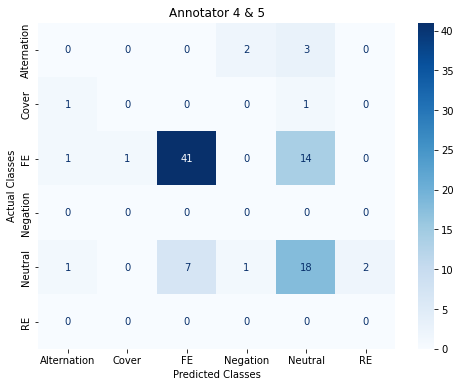

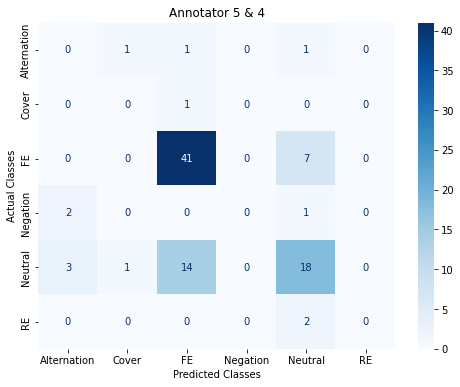

In [290]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
cm_one_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 4 & 5")
plt.savefig('blocks_455_ann45.png', dpi=100)
cm_two_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 5 & 4")
plt.savefig('blocks_455_ann54.png', dpi=100)

In [292]:
block_23 = block_23.rename(columns={'Part of Premise/Hypothesis Modified':'Modified SUBJ/VERB/OBJECT'})
res = block_23.groupby(['Modified SUBJ/VERB/OBJECT', 'H', 'S']).count().reset_index()[[ 'Quantifier Type', 'Modified SUBJ/VERB/OBJECT', 'H', 'S','Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Modified SUBJ/VERB/OBJECT','H', 'S','Quantifier Type']]
r= r.rename(columns={ 'Quantifier Type':'Count'})
print("****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 ******** ")
r

****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 ******** 


,Modified SUBJ/VERB/OBJECT,H,S,Count
12,Subject,1,1,22
1,Object,1,1,13
16,Subject,4,4,9
2,Object,1,4,8
7,Object,4,4,6
21,Verb,4,1,4
22,Verb,4,4,3
20,Verb,1,4,3
19,Verb,1,1,3
13,Subject,1,4,3


In [293]:
r.to_excel("block_455_45_modifier.xlsx")

In [294]:
block_23['Quantifier Type'].value_counts()

Adjectives/Adverbs    42
Existential           21
Universal             15
Negation              12
NONE                   3
Name: Quantifier Type, dtype: int64

In [295]:
block_23['Modified SUBJ/VERB/OBJECT'].value_counts()

Subject    39
Object     36
Verb       15
NONE        3
Name: Modified SUBJ/VERB/OBJECT, dtype: int64

In [297]:
r = block_23.groupby(['H', 'S',]).count().reset_index()[['H', 'S',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,H,S,Count
0,1,1,41
7,4,4,18
1,1,4,14
4,4,1,7
10,5,4,3
5,4,2,2
9,5,3,2
2,1,5,1
3,1,7,1
6,4,3,1


In [299]:
rev_label_map = {v:k for k,v in label_map.items()}
for i in ['H', 'S']:
  block_23[i] = block_23[i].map(rev_label_map)

In [300]:
res3 = block_23.groupby(['Quantifier Type','H','S']).count().reset_index()
result = res3[['Quantifier Type','H','S', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for two annotators are: ******")
result = result.rename(columns={"Premise/Hypothesis/Both":"Counts"})
result[result['H'] != result['S']].sort_values(by="Counts", ascending =False)

****** The confused predictions for each modifier for two annotators are: ******


,Quantifier Type,H,S,Counts
2,Adjectives/Adverbs,FE,Neutral,8
7,Existential,FE,Neutral,5
15,Negation,Neutral,FE,2
3,Adjectives/Adverbs,Neutral,FE,2
9,Existential,Neutral,FE,2
12,Negation,Alternation,Negation,2
19,Universal,Alternation,Neutral,1
25,Universal,Neutral,FE,1
24,Universal,FE,Neutral,1
22,Universal,FE,Cover,1


In [301]:
result[result['H'] != result['S']].sort_values(by="Counts", ascending =False).to_excel("block_455_quantifier.xlsx")